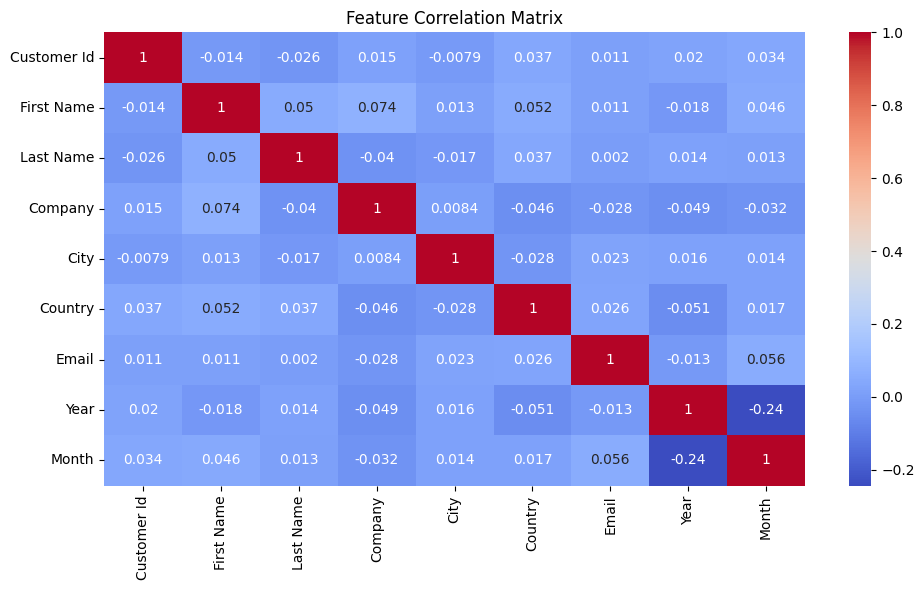

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 2: Load Dataset
df = pd.read_csv("customers-1000.csv")  # Replace with your file path if needed

# Step 3: Initial Exploration
df.drop(columns=["Index", "Phone 1", "Phone 2", "Website"], inplace=True)
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'])
df['Year'] = df['Subscription Date'].dt.year
df['Month'] = df['Subscription Date'].dt.month
df.drop(columns=["Subscription Date"], inplace=True)
df.drop_duplicates(inplace=True)

# Step 4: Encode Categorical Labels
label_encoders = {}
categorical_cols = ['Customer Id', 'First Name', 'Last Name', 'Company', 'City', 'Country', 'Email']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Feature/Label Split
X = df.drop(columns=['Customer Id'])  # Treating Customer ID as label (you can change this)
y = df['Customer Id']

# Step 6: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier()
}

# Step 10: Cross-Validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[name] = scores.mean()

# Output Cross-Validation Results
print("Cross-Validation Accuracy Scores:")
for model_name, score in cv_results.items():
    print(f"{model_name}: {score:.4f}")
